In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#imports

In [49]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from IPython.display import Image


# Μέρος 1


#Παρουσίαση του dataset


Το dataset ήταν χωρισμένο σε αρκετά αρχείο με ονομασίες xa_.dat .Έτσι κάναμε  Concatenate αρχείων δεδομένων σε ένα csv με την παρακάτω εντολή(για linux) : 

cat *.csv > Vechicle.csv 

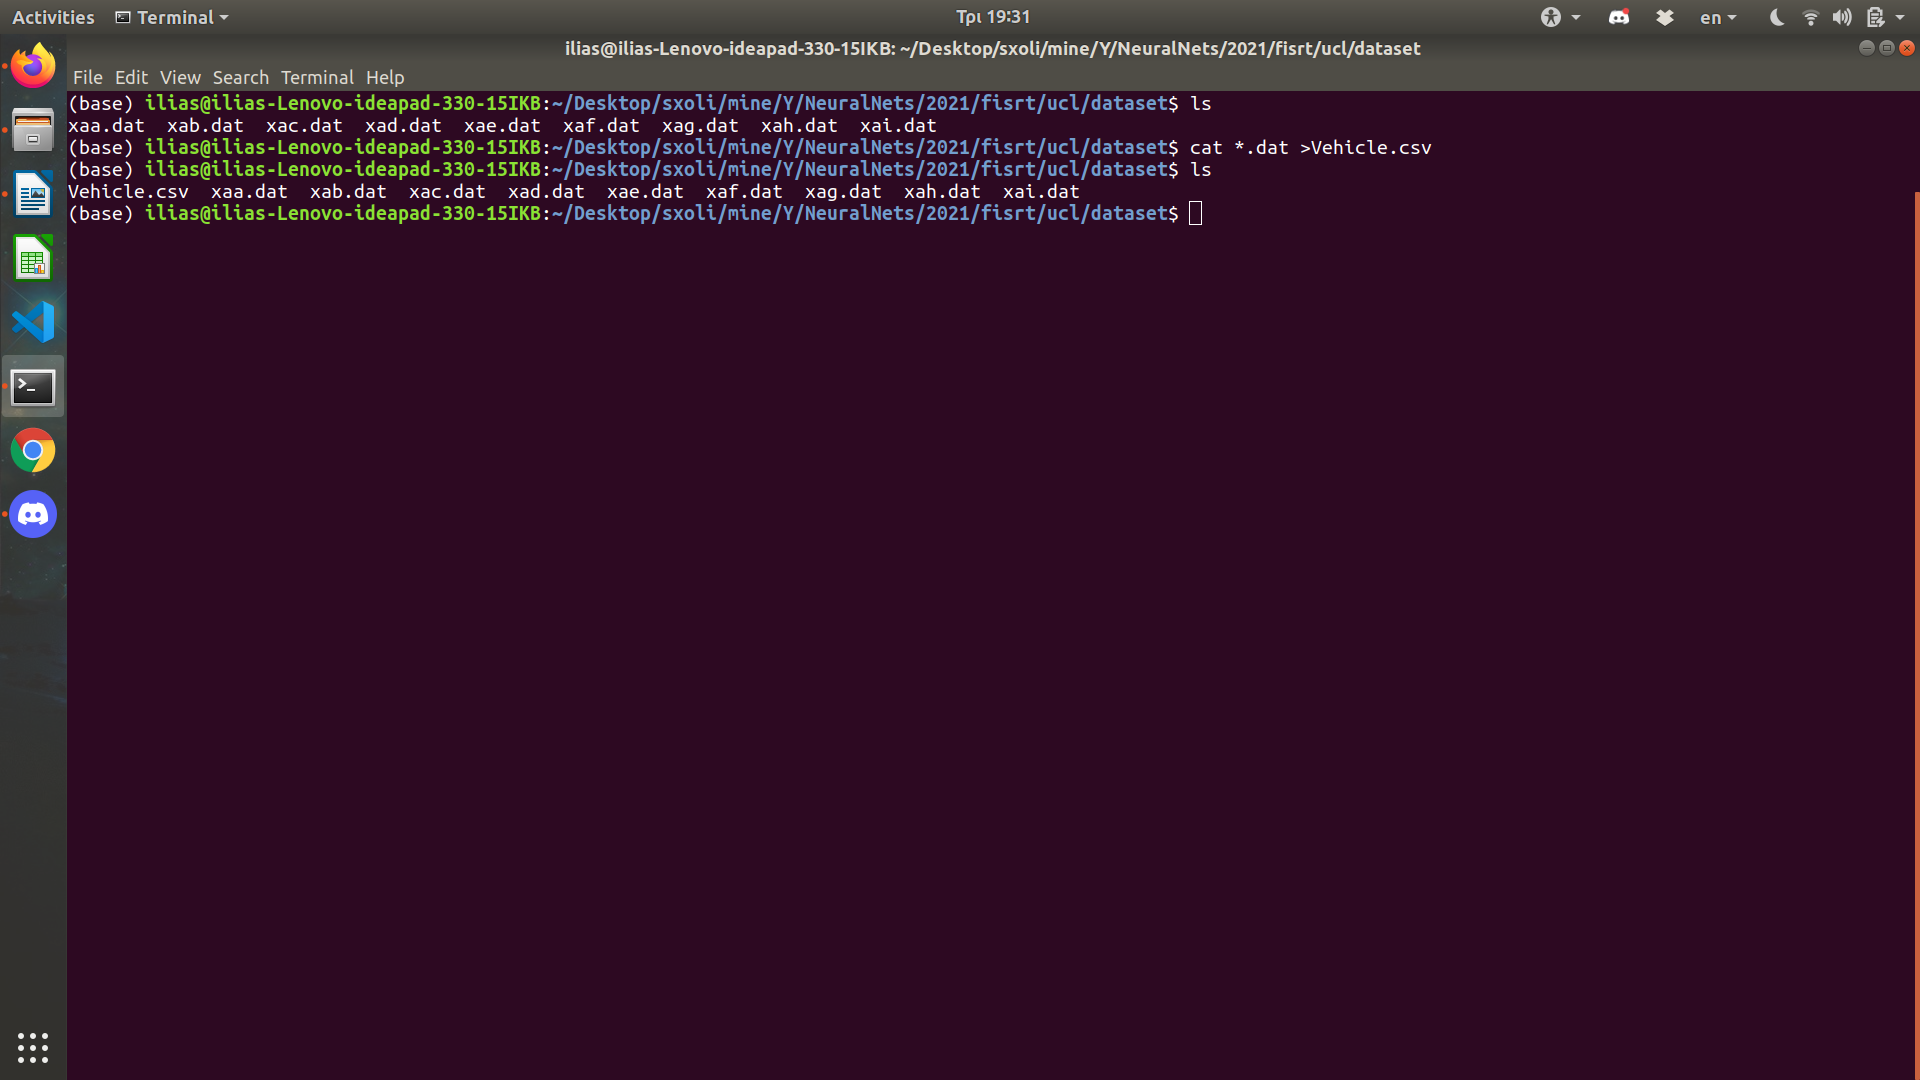

In [50]:
Image('drive/MyDrive/NEURAL/first/uci/datamerge.png')

Το dataset αφορά την αναγνώριση του τύπου του αμαξιού μεταξύ τεσσάρων κλάσεων van, saab, bus, opel. 

In [12]:
file_name = 'drive/MyDrive/NEURAL/first/uci/Vehicle.csv'

vehicle_df = pd.read_csv(file_name,sep=' ',header=None)

In [13]:
vehicle_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van,NaN
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van,NaN
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab,NaN
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van,NaN
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab,NaN
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van,NaN
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab,NaN
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab,NaN


Το αρχείο που είναι αποθηκευμένο ως απλά δεδομένα, οπότε βάζουμε χειροκίνητα τα ονόματα των χαρακτηριστικών, τα οποία διαβάσαμε από την περιφραφή. Επίσης, αναγνωρίζει το endline ως feature, οπότε θα το κάνουμε drop.

In [14]:
vehicle_df = vehicle_df.drop([19],axis=1)

names =["COMPACTNESS", "CIRCULARITY", "DISTANCE CIRCULARITY", "RADIUS RATIO","PR.AXIS ASPECT RATIO"
        ,"MAX.LENGTH ASPECT RATIO","SCATTER RATIO","ELONGATEDNESS","PR.AXIS RECTANGULARITY"
        ,"MAX.LENGTH RECTANGULARITY","SCALED VARIANCE ALONG MAJOR AXIS"
        ,"SCALED VARIANCE ALONG MINOR AXIS","SCALED RADIUS OF GYRATION","SKEWNESS ABOUT MAJOR AXIS"
        ,"SKEWNESS ABOUT MINOR AXIS","KURTOSIS ABOUT MINOR AXIS","KURTOSIS ABOUT MAJOR AXIS"
        ,"HOLLOWS RATIO","CLASS"]

vehicle_df.columns  = names

vehicle_df

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [15]:
vehicle_df.dtypes

COMPACTNESS                          int64
CIRCULARITY                          int64
DISTANCE CIRCULARITY                 int64
RADIUS RATIO                         int64
PR.AXIS ASPECT RATIO                 int64
MAX.LENGTH ASPECT RATIO              int64
SCATTER RATIO                        int64
ELONGATEDNESS                        int64
PR.AXIS RECTANGULARITY               int64
MAX.LENGTH RECTANGULARITY            int64
SCALED VARIANCE ALONG MAJOR AXIS     int64
SCALED VARIANCE ALONG MINOR AXIS     int64
SCALED RADIUS OF GYRATION            int64
SKEWNESS ABOUT MAJOR AXIS            int64
SKEWNESS ABOUT MINOR AXIS            int64
KURTOSIS ABOUT MINOR AXIS            int64
KURTOSIS ABOUT MAJOR AXIS            int64
HOLLOWS RATIO                        int64
CLASS                               object
dtype: object

Έχουμε μόνο int datatypes, οπότε δεν χρειάζεται να κάνουμε κάτι.

In [16]:
rows_count, columns_count = vehicle_df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 846
Total Number of columns : 19


In [17]:
label_names = vehicle_df['CLASS'].unique()
print('Class: ', label_names)

Class:  ['van' 'saab' 'bus' 'opel']


Οι ετικέτες  των κλάσεων είναι  opel, saab, bus, van  και βρίσκοτναι στην τελευταία στήλη , δηλαδή την 19, με index 18 

In [18]:
vehicle_df.isnull().sum()

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
CLASS                               0
dtype: int64

No missing values

In [19]:
vehicle_df['CLASS'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: CLASS, dtype: int64

balanced dataset

##Preperation

In [20]:
  X = vehicle_df.iloc[:,0:18]
  y = vehicle_df.iloc[:,18]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 10)

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)


In [22]:
print("Train set size: " , len(X_train))
print("Test set size:  " , len(X_test))

Train set size:  592
Test set size:   254


το class ειναι μη διατεταγμένο

##Predictors

#####EvaluateModel function def

In [23]:
from sklearn.metrics import f1_score, accuracy_score

def EvaluateModel(preds):
  accuracy =accuracy_score(y_test,preds)
  f1 = f1_score(y_test,preds,average='macro')
  return accuracy, f1

###OUT OF THE BOX

####Dummy

In [24]:
out_of_the_box_metrics = {}

dc_uniform = DummyClassifier(strategy="uniform")
model = dc_uniform.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_uniform'] = EvaluateModel(predictions)

dc_constant_bus = DummyClassifier(strategy="constant", constant='bus')
model = dc_constant_bus.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_constant_bus'] = EvaluateModel(predictions)


dc_constant_saab = DummyClassifier(strategy="constant", constant='saab')
model = dc_constant_saab.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_constant_saab'] = EvaluateModel(predictions)

dc_constant_opel = DummyClassifier(strategy="constant", constant='opel')
model = dc_constant_opel.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_constant_opel'] = EvaluateModel(predictions)

dc_constant_van = DummyClassifier(strategy="constant", constant='van')
model = dc_constant_van.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_constant_van'] = EvaluateModel(predictions)

dc_most_frequent = DummyClassifier(strategy="most_frequent")
model = dc_most_frequent.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_most_frequent'] = EvaluateModel(predictions)

dc_stratified = DummyClassifier(strategy="stratified")
model = dc_stratified.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['dc_stratified'] = EvaluateModel(predictions)


####GNB

In [25]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['GNB']= EvaluateModel(predictions)

####KNN

In [26]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['KNN']= EvaluateModel(predictions)

####Logistic

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
out_of_the_box_metrics['Log_Reg']= EvaluateModel(predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###Metrics


In [28]:
out_of_the_box_accuracies = []
out_of_the_box_F1s = []
for key in out_of_the_box_metrics:
  print(key,' : ',out_of_the_box_metrics[key][0],out_of_the_box_metrics[key][1])
  out_of_the_box_accuracies.append(out_of_the_box_metrics[key][0])
  out_of_the_box_F1s.append(out_of_the_box_metrics[key][1])


dc_uniform  :  0.2637795275590551 0.26170390118190706
dc_constant_bus  :  0.2795275590551181 0.10923076923076924
dc_constant_saab  :  0.2755905511811024 0.1080246913580247
dc_constant_opel  :  0.21653543307086615 0.0889967637540453
dc_constant_van  :  0.2283464566929134 0.09294871794871795
dc_most_frequent  :  0.21653543307086615 0.0889967637540453
dc_stratified  :  0.24015748031496062 0.2401586156421927
GNB  :  0.4409448818897638 0.40998126203621676
KNN  :  0.6692913385826772 0.6534668815286286
Log_Reg  :  0.7440944881889764 0.7337096786117185


####Markdown table

|                  | Accuracy             | F1                  |
|------------------|----------------------|---------------------|
| dc_uniform       | 0.2440944881889764   | 0.2433898875580448  |
| dc_constant_bus  | 0.2795275590551181   | 0.10923076923076924 |
| dc_constant_saab | 0.2755905511811024   | 0.1080246913580247  |
| dc_constant_opel | 0.21653543307086615  | 0.0889967637540453  |
| dc_constant_van  | 0.2283464566929134   | 0.09294871794871795 |
| dc_most_frequent | 0.21653543307086615  | 0.0889967637540453  |
| dc_stratified    | 0.28346456692913385  | 0.28250289773833603 |
| GNB              | 0.4409448818897638   | 0.40998126203621676 |
| Log_Reg          | 0.7440944881889764   | 0.7337096786117185  |
| KNN              | 0.6692913385826772   | 0.6534668815286286  |

####Bar Plot

#####BarPlos function def


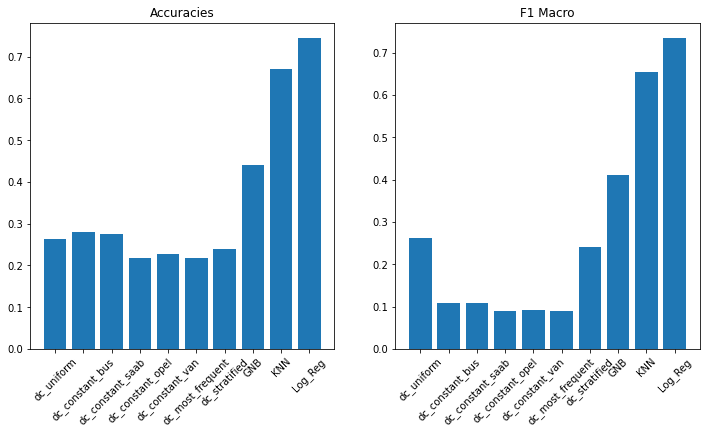

In [29]:
import matplotlib.pyplot as plt


def BarPlots(keys,accuracies,F1s):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

  ax1.set_xticklabels(keys,rotation=45)
  ax1.set_title('Accuracies')
  ax1.bar(keys, accuracies)

  ax2.set_xticklabels(keys, rotation=45)
  ax2.set_title('F1 Macro')
  ax2.bar(keys, F1s)

BarPlots(out_of_the_box_metrics.keys(),out_of_the_box_accuracies,out_of_the_box_F1s)

Για τους dummies τα αποτελέσματα είναι αναμενόμενα, με 25% ακρίβεια, σαν να μαντεύουν στην τύχη. Όσον αφορά τους άλλους ταξινομητες, ο καλύτερος είναι το Logistic regression.

##Optimisation

###Pre-Processing

####Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
scaled_X_train = sc.transform(X_train)
scaled_X_test  = sc.transform(X_test)

In [31]:
print("Max value: ",scaled_X_train.max())
print("Min value: ",scaled_X_train.min())

Max value:  9.268392468816852
Min value:  -2.668248967781971


####Variance Threshold

In [41]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold =1)
selector.fit(scaled_X_train)
transformed_X_train = selector.fit_transform(scaled_X_train)

transformed_X_train.shape

(592, 2)

Για threshold >1 κράταγε μόνο 2 χαρακτηριστικά, τα οποία είναι λίγα, ενώ για οποιαδήποτε άλλη τιμή τα κρατάει όλα. Οπότε αποφασίσαμε να μην εφαρμόσουμε το VarianceThreshold.

In [43]:
optimised_metrics = {}
optimised_time = {}
predictions = {}

###GNB


In [47]:
var_smoothings = list(range(-20,15,5))
var_smoothings = [10**x for x in var_smoothings]
var_smoothings = list(range(1,100,8))
params = {'var_smoothing': var_smoothings}

model = GaussianNB()
model = GridSearchCV(model,cv=10, param_grid=params, verbose=0,scoring='accuracy')
model.fit(scaled_X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)
print("At train set scored  : ", model.best_score_)



predictions['GNB'] = model.predict(scaled_X_test)
optimised_metrics['GNB'] = EvaluateModel(predictions['GNB'])
optimised_time['GNB'] = (model.cv_results_['mean_fit_time'],model.cv_results_['mean_score_time'])

print("At test set scored : ", optimised_metrics['GNB'])

Best Hyper Parameters:
 {'var_smoothing': 9}
At train set scored  :  0.4459322033898305
At test set scored :  (0.46062992125984253, 0.4505030929449534)


Βλέπουμε ότι έχει ελάχιστον uderfitting, καθώς έχουμε καλύτερες μετρικές στο test παρά στο train set.

###KNN

In [ ]:
k_neighbors = list(range(1,100,8))
params = {'n_neighbors': k_neighbors, 'weights': ['uniform', 'distance']}

model = KNeighborsClassifier()
model = GridSearchCV(model,cv=10, param_grid=params, verbose=0,scoring='accuracy')
model.fit(scaled_X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)
print("At train set scored  : ", model.best_score_)



predictions['KNN'] = model.predict(scaled_X_test)
optimised_metrics['KNN'] = EvaluateModel(predictions['KNN'])
optimised_time['KNN'] = (model.cv_results_['mean_fit_time'],model.cv_results_['mean_score_time'])

print("At test set scored : ", optimised_metrics['KNN'])

Best Hyper Parameters:
 {'n_neighbors': 17, 'weights': 'distance'}
At train set scored  :  0.7144632768361582
At test set scored :  (0.6968503937007874, 0.6775248560962845)


Εδώ βλέπουμε ότι το μοντέλο μας έχει αρχίσει να κάνει overfitting.

###Logistic Regression

In [ ]:
C = [0.2,0.5,1.0,1.5,2.0,2.5]
tol = [8,7,6,5,4,3,2]
tol = [10**(-x) for x in tol]

params = { 'C' :C, 'tol':tol}

model = LogisticRegression(max_iter=500)
model = GridSearchCV(model,cv=10, param_grid=params, verbose=0,scoring='accuracy')
model.fit(scaled_X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)
print("At train set scored  : ", model.best_score_)



predictions['Log_Reg'] = model.predict(scaled_X_test)
optimised_metrics['Log_Reg'] = EvaluateModel(predictions['Log_Reg'])
optimised_time['Log_Reg'] = (model.cv_results_['mean_fit_time'],model.cv_results_['mean_score_time'])


print("At test set scored : ", optimised_metrics['Log_Reg'])

Best Hyper Parameters:
 {'C': 2.0, 'tol': 1e-08}
At train set scored  :  0.8024293785310735
At test set scored :  (0.8070866141732284, 0.8017503439972289)


Ενώ σε αυη την περίπρωση, έχουμε πολύ καλύ ισορροπία μεταξύ train και test set.

###Metrics

GNB  :  0.46062992125984253 0.4505030929449534
KNN  :  0.6968503937007874 0.6775248560962845
Log_Reg  :  0.8070866141732284 0.8017503439972289


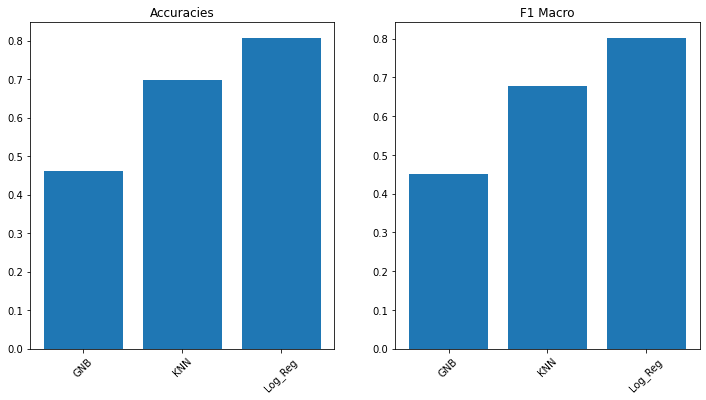

In [ ]:
optimised_accuracies = []
optimised_F1s = []

for key in optimised_metrics:
  print(key,' : ',optimised_metrics[key][0],optimised_metrics[key][1])
  optimised_accuracies.append(optimised_metrics[key][0])
  optimised_F1s.append(optimised_metrics[key][1])


BarPlots(optimised_metrics.keys(),optimised_accuracies,optimised_F1s)

####Bar Plots

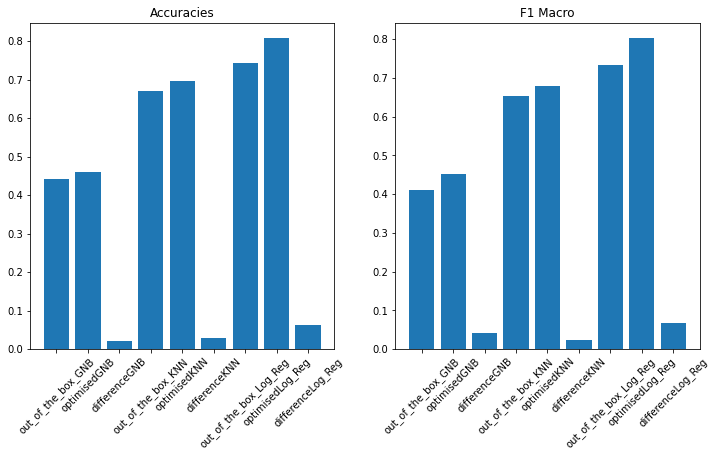

In [ ]:

names = []
accs = []
F1s = []
for key in optimised_metrics:
  names.append("out_of_the_box_"+key)
  names.append("optimised"+key)
  names.append("difference"+key)

  accs.append(out_of_the_box_metrics[key][0])
  accs.append(optimised_metrics[key][0])
  accs.append(abs(optimised_metrics[key][0] -out_of_the_box_metrics[key][0]))

  F1s.append(out_of_the_box_metrics[key][1])
  F1s.append(optimised_metrics[key][1])
  F1s.append(abs(out_of_the_box_metrics[key][1] -optimised_metrics[key][1]))


BarPlots(names,accs,F1s)

Στο παραπάνω διάγραμμα βλέπουμε την επίδραση την βελτιστοποίησης μας. Η αλήθεια είναι ότι δεν έκανε μεγάλη διαφορά.

####Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def plotConfusionMatrix(cm):

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(label_names); 
  ax.yaxis.set_ticklabels(label_names);
  

#####WORSE

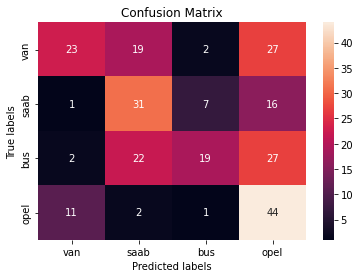

In [ ]:
cm_naive_bayes = confusion_matrix(y_test, predictions['GNB'])
plotConfusionMatrix(cm_naive_bayes)

#####BEST

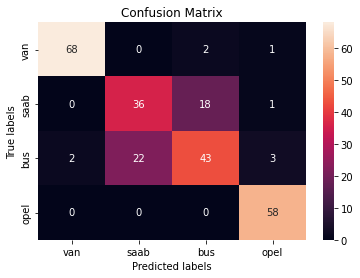

In [ ]:
cm_Log_Reg= confusion_matrix(y_test, predictions['Log_Reg'])
plotConfusionMatrix(cm_Log_Reg)

Απο τον πίνακα σύγχησης βλέπουε ότι οι κλάσεις saab αι bus είναι αυτές που προκαλούν το πρόβλημα, καθώς σχεδόν όλα τα λάθη είναι μεταξύ αυτών των δύο.

####Markdown table

In [ ]:
def markdownGenerator():
  names = ['out of the box','optimised','difference','mean fit time', 'mean score time']
  header = '| |'
  for name in names:
    header = header+" " +name+' |'

  print(header)

  split = '|--|'
  for _ in names:
    split = split+ '--|'

  print(split)
  keys = ['GNB','KNN','Log_Reg']
  for key in keys:
    line = '|'+key+'|'+ str(out_of_the_box_metrics[key][0]) + '|'+ str(optimised_metrics[key][0]) +'|' + str(abs(optimised_metrics[key][0] -out_of_the_box_metrics[key][0]))+ '|' + str(sum(optimised_time[key][0])/len(optimised_time[key][0])) +'|' +str(sum(optimised_time[key][1])/len(optimised_time[key][1])) +'|'
    print(line)
markdownGenerator()

| | out of the box | optimised | difference | mean fit time | mean score time |
|--|--|--|--|--|--|
|GNB|0.4409448818897638|0.46062992125984253|0.01968503937007876|0.001753966624920185|0.0006597170462975134|
|KNN|0.6692913385826772|0.6968503937007874|0.027559055118110187|0.001901462444892297|0.004469934793619009|
|Log_Reg|0.7440944881889764|0.8070866141732284|0.06299212598425197|0.04593197958809989|0.0006072560946146647|


| | out of the box | optimised | difference | mean fit time | mean score time |
|--|--|--|--|--|--|
|GNB|0.4409448818897638|0.46062992125984253|0.01968503937007876|0.001753966624920185|0.0006597170462975134|
|KNN|0.6692913385826772|0.6968503937007874|0.027559055118110187|0.001901462444892297|0.004469934793619009|
|Log_Reg|0.7440944881889764|0.8070866141732284|0.06299212598425197|0.04593197958809989|0.0006072560946146647|


#Συμπεράσματα

Προφανώς, ο καλύτερος ταξινομητής είναι το Logistic Regressin πριν και μετά το optimisation.